In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data_clean.csv")
df.head()

,Series 1
0,2397.167568
1,2371.333300
2,2573.025408
3,NaN
4,2574.872476


In [3]:
len(df)

2517

In [4]:
df = df.interpolate(method='linear', axis=0)
df.head(10)

,Series 1
0,2397.167568
1,2371.333300
2,2573.025408
3,2573.948942
4,2574.872476
5,1769.398592
6,2703.937630
7,2804.961314
8,2786.623682
9,2751.215054


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Series 1  2517 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


<AxesSubplot:>

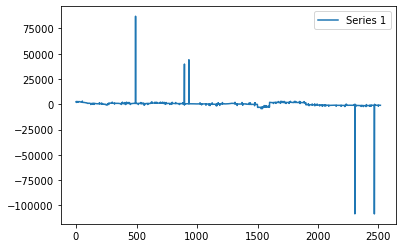

In [6]:
df.plot()

In [7]:
q25, q75 = np.percentile(df["Series 1"].to_list(), 25), np.percentile(df["Series 1"].to_list(), 75)

In [8]:
q25, q75

(-697.0500948086659, 907.892872191334)

In [9]:
k = 1.5
iqr = q75 - q25
cut_off = iqr * k
lower, upper = q25 - cut_off, q75 + cut_off
    
# For comparison, make one array each at varying values of k.
df2 = df.copy()
df2["Series 1"] = df2["Series 1"].apply(lambda x: np.nan if ((x < lower) | (x > upper)) else x)

In [10]:
df2 = df2.interpolate(method='linear', axis=0)

<AxesSubplot:>

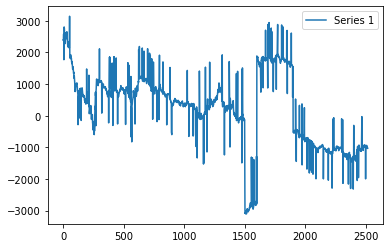

In [11]:
df2.plot()

In [74]:
q25, q75 = np.percentile(df2["Series 1"].to_list(), 25), np.percentile(df2["Series 1"].to_list(), 75)
print(q25, q75)

-693.4907838086659 902.7557781913338


In [81]:
q25, q75 = np.percentile(df2["Series 1"].to_list(), 25), np.percentile(df2["Series 1"].to_list(), 75)
print(q25, q75)
k = 0.5
iqr = q75 - q25
cut_off = iqr * k
lower, upper = q25 - cut_off, q75 + cut_off
    
# For comparison, make one array each at varying values of k.
df3 = df2.copy()
df3["Series 1"] = df3["Series 1"].apply(lambda x: np.nan if ((x < lower) | (x > upper)) else x)

-693.4907838086659 902.7557781913338


In [82]:
df3 = df3.interpolate(method='linear', axis=0)

<AxesSubplot:>

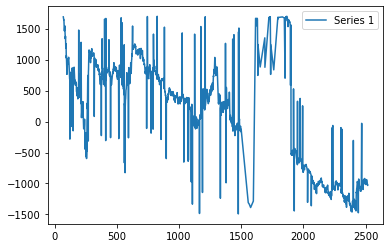

In [83]:
df3.plot()

In [12]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

In [17]:
outliers_removed = df2["Series 1"].to_list()

29.79737783075089


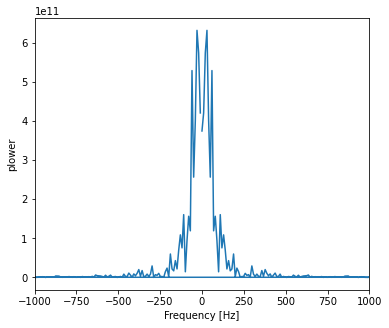

In [26]:
time_step = 1.0 / 25000.0
sig_fft = fftpack.fft(outliers_removed)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(outliers_removed), d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
plt.xlim([-1000,1000])
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
print(peak_freq)

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

C:\Users\tansi\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


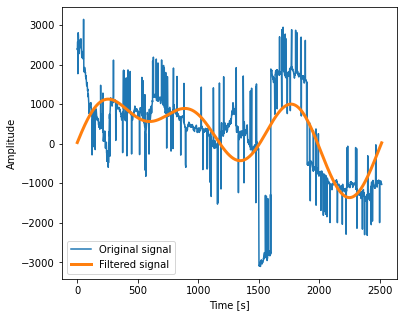

In [22]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(outliers_removed, label='Original signal')
plt.plot(filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

In [37]:
from scipy import signal
sos = signal.butter(4, 100, 'low', fs=1000, output='sos')
filtered = signal.sosfilt(sos, outliers_removed)

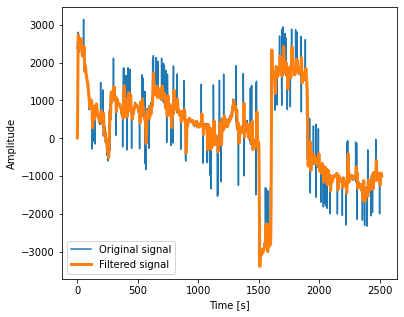

In [38]:
plt.figure(figsize=(6, 5))
plt.plot(outliers_removed, label='Original signal')
plt.plot(filtered, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

In [39]:
filtered

array([  11.56475943,   85.10201168,  302.45182313, ..., -959.12156232,
       -974.73295278, -988.309709  ])

In [40]:
new_series = pd.Series(filtered)

In [41]:
new_series

0         11.564759
1         85.102012
2        302.451823
3        708.905451
4       1261.374557
           ...     
2512    -925.548883
2513    -941.983241
2514    -959.121562
2515    -974.732953
2516    -988.309709
Length: 2517, dtype: float64

In [42]:
cleaned_df = pd.DataFrame()

In [43]:
cleaned_df["Series 1"] = new_series

In [44]:
cleaned_df

,Series 1
0,11.564759
1,85.102012
2,302.451823
3,708.905451
4,1261.374557
...,...
2512,-925.548883
2513,-941.983241
2514,-959.121562
2515,-974.732953


In [49]:
cleaned_df.to_csv("yag_data_cleaning.csv", index = False)